In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2024-11-14 12:23:27.487094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-14 12:23:28.382122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __Deep Learning workflow:__
<font size=3>
    
1. Import and data pre-processing;   
2. Neural network modeling;
3. Model compilation;
4. Train and validation;
5. Final training;
6. Test evaluation;
7. Saving the model.

### __1. Import and data pre-processing:__
<font size=3>
    
1.1 Import data;\
1.2 Data visualization;\
1.3 Feature engineering;\
1.4 Data shuffling;\
1.5 Train, validation, and test tensor divition.

Our next problem is a supervised regression task using the classical [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. The data is available in the [Keras dataset](https://keras.io/api/datasets/mnist/).  

In [2]:
# import MNIST data:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

print(f"x-train:{x_train.shape}, y-train:{y_train.shape}")
print(f"x-test:{x_test.shape}, y-test:{y_test.shape}")

x-train:(60000, 28, 28), y-train:(60000,)
x-test:(10000, 28, 28), y-test:(10000,)


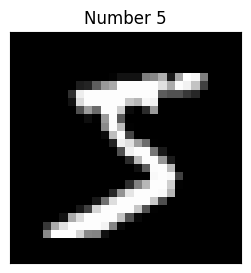

In [3]:
# visualizing handwritten digits:
i = 0

plt.figure(figsize=(5,3))
plt.title("Number "+str(y_train[i]))
plt.imshow(x_train[i], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
# shuffling train data:
i = np.random.permutation(x_train.shape[0])

x_train = x_train[i]
y_train = y_train[i]

# shuffling test data:
i = np.random.permutation(x_test.shape[0])

x_test = x_test[i]
y_test = y_test[i]

In [5]:
# normalization:
print(f"train: min = {x_train.min()}, max = {x_train.max()}")
print(f"test: min = {x_test.min()}, max = {x_test.max()}\n")

Max = x_train.max()

x_train = x_train/Max
x_test = x_test/Max

print(f"train: min = {x_train.min()}, max = {x_train.max()}")
print(f"test: min = {x_test.min()}, max = {x_test.max()}")

train: min = 0, max = 255
test: min = 0, max = 255

train: min = 0.0, max = 1.0
test: min = 0.0, max = 1.0


In [6]:
# one-hot encoding for label data:

def one_hot(labels):
    N = labels.size
    
    y_hot = np.zeros((N, 10), dtype="float32")
    
    for i, y in enumerate(labels):
        y_hot[i][y] = 1

    return y_hot

print(y_train[:4], "\n")

y_train = one_hot(y_train)
y_test = one_hot(y_test)

print(y_train[:4], "\n")

print(f"y-train:{y_train.shape}, y-test:{y_test.shape}")

[1 9 7 6] 

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] 

y-train:(60000, 10), y-test:(10000, 10)


In [7]:
# flatten x data (the number arrays) as dense layers' input vectors: (N, 28, 28) -> (N, 28*28)
def flatten(x):

    N, n, m = x.shape

    return x.reshape(N, n*m)

print(x_train.shape)

x_train = flatten(x_train)
x_test = flatten(x_test)

print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# splitting the train data into train and validation:

N_val = int(0.2*x_train.shape[0])

print(f"N-train = {x_train.shape[0]-N_val}, N-val = {N_val}, N-test = {x_test.shape[0]}")

N-train = 48000, N-val = 12000, N-test = 10000


In [9]:
x_val = x_train[:N_val]
x_train = x_train[N_val:]

y_val = y_train[:N_val]
y_train = y_train[N_val:]

print(f"x-train:{x_train.shape}, x-val:{x_val.shape}, x-test:{x_test.shape}")
print(f"y-train:{y_train.shape}, y-val:{y_val.shape}, y-test:{y_test.shape}")

x-train:(48000, 784), x-val:(12000, 784), x-test:(10000, 784)
y-train:(48000, 10), y-val:(12000, 10), y-test:(10000, 10)


### __2. Neural network modeling:__
<font size=3>
    
2.1 Define initial layer's shape;\
2.2 Define output layer's shape and its [activation function](https://keras.io/api/layers/activations/);\
2.3 Define hidden layers.


In [10]:
In = keras.Input(shape=(x_train.shape[1],))

x = layers.Dense(400, activation="relu")(In)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(200, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(100, activation="relu")(x)
x = layers.BatchNormalization()(x)

Out = layers.Dense(y_train.shape[1], activation="softmax")(x)

model = keras.Model(inputs=In, outputs=Out)

model.summary()

2024-11-14 12:23:30.669776: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,110 (1.59 MB)

 Trainable params: 416,710 (1.59 MB)

 Non-trainable params: 1,400 (5.47 KB)

### __3. Model compilation:__
<font size=3>

3.1 Define [optimizer](https://keras.io/api/optimizers/);\
3.2 Define [loss function](https://keras.io/api/losses/);\
3.3 Define [validation metric](https://keras.io/api/metrics/).


In [11]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['acc'])

### __4. Train and validation__
<font size=3>
    
Here, using the training data, the optimizer updates the values of the model's inner parameters (_i.e._, weights, biases, etc.) over the epochs while minimizing/maximizing the loss function. Meanwhile, the model's performance is measured for each epoch using the validation data. At this workflow stage, we model the neural network architecture to avoid [overfitting and underfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/).
   

### __5. Final training__
<font size=3>

Once the modeling is completed, we concatenate train and validation data to fit again the model.

__Note:__ use the same number of __epochs__ and __batch-size__ from the previous step.
    

In [ ]:
report = model.fit(x=np.concatenate([x_train, x_val]), 
                   y=np.concatenate([y_train, y_val]), 
                   batch_size=50, epochs=50)

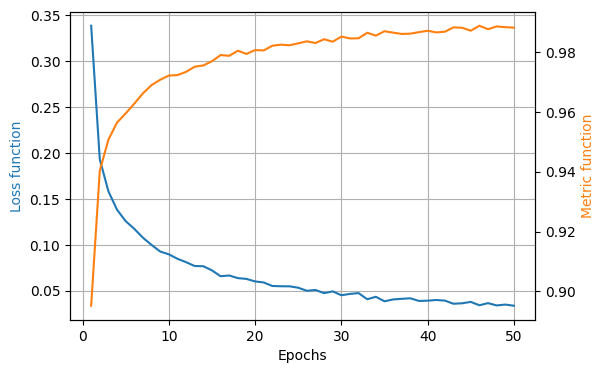

In [13]:
loss = report.history['loss']
acc = report.history['acc']

epochs = np.linspace(1, len(loss), len(loss))

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

ax1.plot(epochs, loss, c='#1f77b4', label="loss")
ax2.plot(epochs, acc, c='#ff7f0e', label="acc")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss function", c='#1f77b4')
ax2.set_ylabel("Metric function", c='#ff7f0e')

ax1.grid()
plt.show()

### __6. Test evaluation__:

    6.1 Make the evaluation using the test data;
    6.1 Make some predictions to visualize the results;
   

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9863 - loss: 0.0446


[0.048112496733665466, 0.98580002784729]

In [15]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [16]:
print("y-test =", y_test[0])
print("y-pred =", y_pred[0])

y-test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y-pred = [4.6211410e-10 5.9465523e-11 1.5845418e-09 3.3720784e-07 4.4920064e-08
 2.2654914e-09 1.3296479e-10 4.6131053e-08 3.1724781e-09 9.9999946e-01]


In [17]:
n = np.random.randint(low=0, high=x_test.shape[0], size=10)

for y1, y2 in zip(y_test[n], y_pred[n]):
    
    l1 = np.argmax(y1)
    l2 = np.argmax(y2)
    
    print(f"y-test = {l1}, y-pred = {l2}: {l1 == l2}")
    

y-test = 3, y-pred = 3: True
y-test = 1, y-pred = 1: True
y-test = 3, y-pred = 3: True
y-test = 0, y-pred = 0: True
y-test = 2, y-pred = 2: True
y-test = 0, y-pred = 0: True
y-test = 1, y-pred = 1: True
y-test = 5, y-pred = 5: True
y-test = 5, y-pred = 5: True
y-test = 4, y-pred = 4: True


### __7. Saving the model__:

In [18]:
model.save_weights("../weights/dense_mnist.weights.h5")

<font size=3>
    
For model __loading__, see [2.3-handson-loading_model](../2-over_vs_underfitting/2.3-handson-loading_model.ipynb).